# 1. Create dataset for supermarket perform data clearning and association mining using fpgrowth in rapidminer

## Create Dataset

In [77]:
import pandas as pd
import random
import string
data = {
        'Ragi': list("".join(random.choices(["1","0",""])) for i in range(1,50)),
        'Rice': list(random.randint(0,1) for i in range(1,50)),
        'Potato': list(random.randint(0,1) for i in range(1,50)),
        'Tomato': list(random.randint(0,1) for i in range(1,50)),
        'Brinjal':list(random.randint(0,1) for i in range(1,50)),
        }

df = pd.DataFrame (data, columns = ['Ragi','Rice','Potato','Tomato','Brinjal'],index=list(range(1,50)))
df.index.name = "tid"

df.to_csv("marketbasket.csv")
df = pd.read_csv("marketbasket.csv")
df.head()

,tid,Ragi,Rice,Potato,Tomato,Brinjal
0,1,1.0,0,1,0,1
1,2,1.0,1,1,0,0
2,3,1.0,1,0,1,0
3,4,1.0,1,1,0,0
4,5,0.0,1,1,0,0


# 1.b For a set of 20 points write a R or python program to generate 3 clusters using K means

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

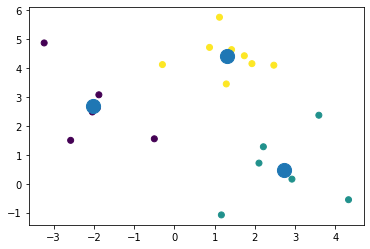

In [71]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c = kmeans.labels_ )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],s=200)

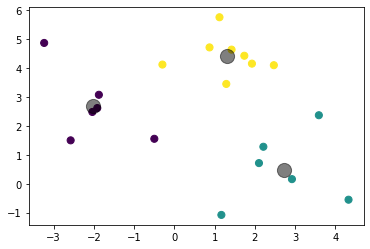

In [62]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y_test = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


# 2.a Create a bank dataset 


In [39]:
import pandas as pd
import random
import string

data = {
        'Name': list(''.join(random.choices(string.ascii_uppercase, k = 5)) for i in range(1,50)),
        'Gender': list(" ".join(random.choices(['M','F',''])) for i in range(1,50)),
        'State': list(''.join(random.choices(['karnataka','kerala','tamilnadu','andhra',''])) for i in range(1,50)),
        'age': list(random.randint(12,60) for i in range(1,50)),
        'amount': list(random.randint(5000,150000) for i in range(1,50)),
        'job':list("".join(random.choices(['Teacher','Doctor','Farmer'])) for i in range(1,50)),
        'fraud':list("".join(random.choices(["yes","no"])) for i in range(1,50))
        }

df = pd.DataFrame (data, columns = ['Name','Gender','State','age','amount','job','fraud'],index=list(range(1,50)))
df.index.name = "id"

df.to_csv("output.csv")
df = pd.read_csv("output.csv")
df.head()

,id,Name,Gender,State,age,amount,job,fraud
0,1,EOUDW,M,tamilnadu,19,139125,Farmer,yes
1,2,OLNNE,NaN,tamilnadu,43,53018,Teacher,no
2,3,UQBTT,NaN,andhra,56,52250,Doctor,yes
3,4,GRITL,M,tamilnadu,18,31906,Doctor,no
4,5,ANBCE,NaN,tamilnadu,25,107952,Farmer,no


# 3.b

[ 0  0  0  1  1  0 -1 -1  0  0  1  0  0  1  0  0  0  0  1  0]


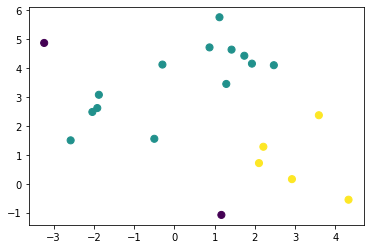

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y_test = make_blobs(n_samples=20, centers=3, n_features=2,
                  random_state=0)
clustering = DBSCAN(eps=2, min_samples=2).fit(X)
print(clustering.labels_)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=50)



# 5.b

In [150]:
df = pd.read_csv('marketbasket.csv')

In [151]:
df = df.drop("tid",axis=1)

In [152]:
df.head()

,Ragi,Rice,Potato,Tomato,Brinjal
0,1.0,0,1,0,1
1,1.0,1,1,0,0
2,1.0,1,0,1,0
3,1.0,1,1,0,0
4,0.0,1,1,0,0


In [153]:
list_of_transactions = []

for i in range(len(df)):
    transaction = []
    for j in range(len(df.columns)):
        if df.values[i][j] == 1:
            transaction.append(df.columns[j])
    if len(transaction):
        list_of_transactions.append(transaction)

In [ ]:
list

In [154]:
list_of_transactions[:3]

[['Ragi', 'Potato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato'],
 ['Ragi', 'Rice', 'Tomato']]

In [155]:
from apyori import apriori

In [168]:
rules = list(apriori(transactions = list_of_transactions, min_sup = 0.4, min_confidence = 0.6))

In [169]:
rules[0]

RelationRecord(items=frozenset({'Brinjal', 'Potato'}), support=0.3617021276595745, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Brinjal'}), items_add=frozenset({'Potato'}), confidence=0.6296296296296297, lift=1.0960219478737996), OrderedStatistic(items_base=frozenset({'Potato'}), items_add=frozenset({'Brinjal'}), confidence=0.6296296296296297, lift=1.0960219478737996)])

In [158]:
for item in rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + ",".join(items[1:]))
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Brinjal -> Potato
Support: 0.3617021276595745
Confidence: 0.6296296296296297
Lift: 1.0960219478737996
Rule: Tomato -> Brinjal
Support: 0.3191489361702128
Confidence: 0.6000000000000001
Lift: 1.0444444444444445
Rule: Ragi -> Potato
Support: 0.3191489361702128
Confidence: 0.75
Lift: 1.3055555555555554
Rule: Brinjal -> Ragi,Potato
Support: 0.1702127659574468
Confidence: 0.7999999999999999
Lift: 1.3925925925925924
Rule: Tomato -> Brinjal,Potato
Support: 0.1702127659574468
Confidence: 0.8888888888888888
Lift: 1.5473251028806583
Rule: Rice -> Ragi,Potato
Support: 0.1276595744680851
Confidence: 0.75
Lift: 1.3055555555555554


In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()

X = iris.data
y = iris.target
model = clf.fit(X, y)



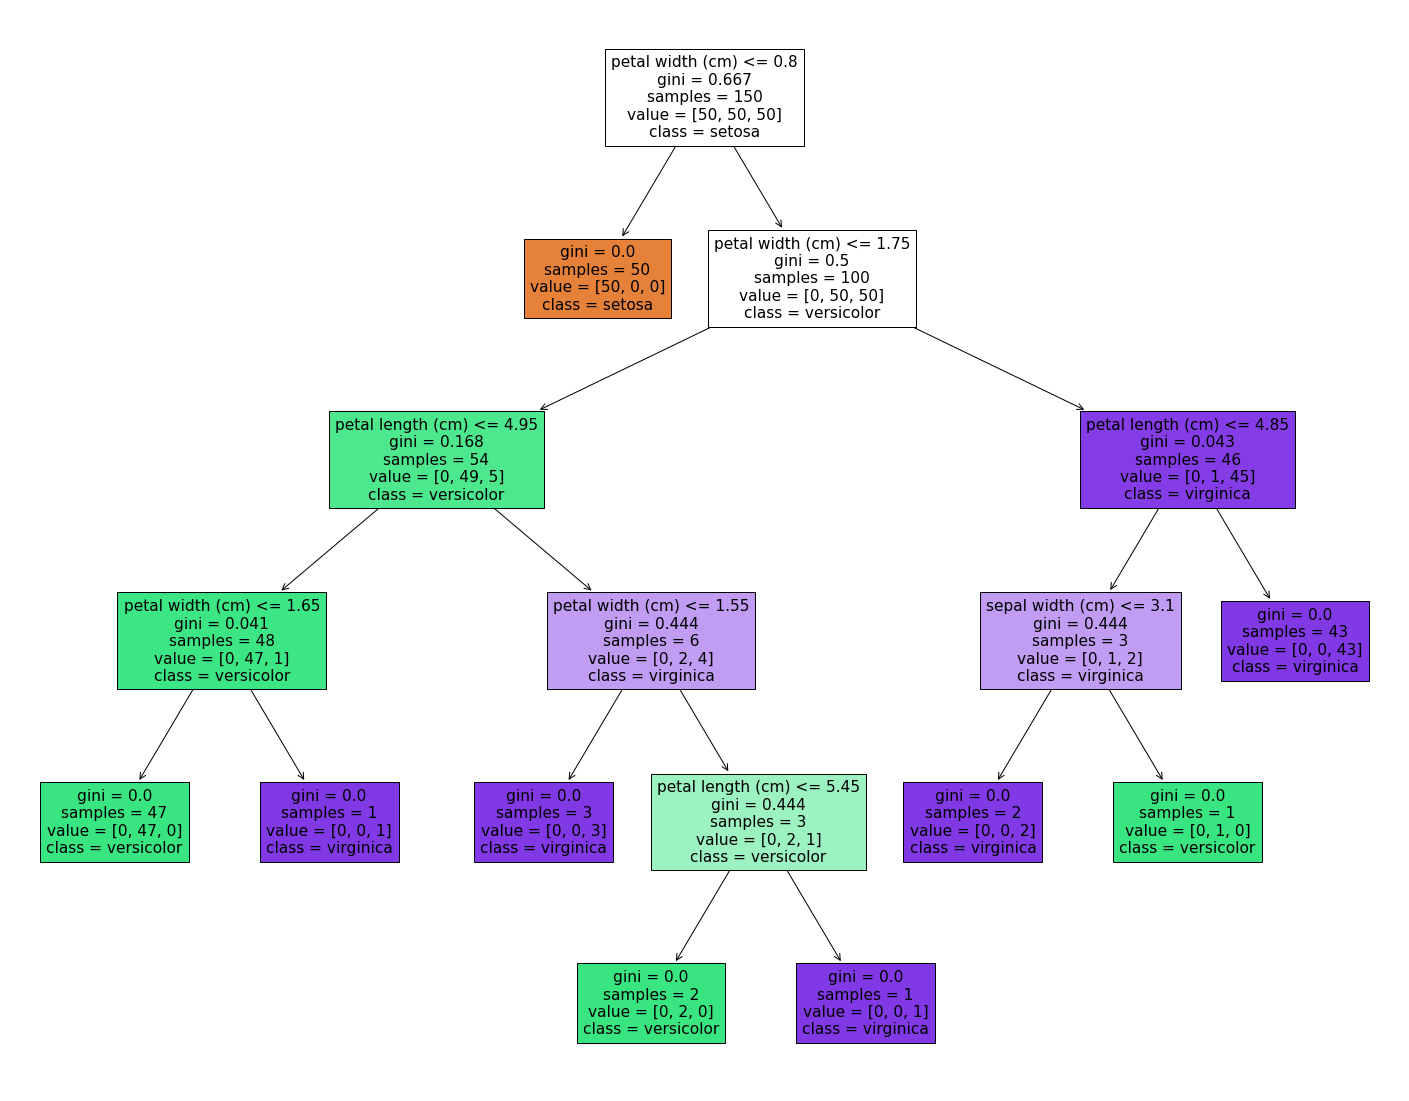

In [159]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [201]:
print('Decision Tree Classifier')
decision_tree_classifier = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_dtree = decision_tree_classifier.predict(X_test)
y_pred_prob_dtree = decision_tree_classifier.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred_dtree, labels=[0, 1,2]))
print(metrics.classification_report(y_test, y_pred_dtree))

Decision Tree Classifier
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



In [202]:
y_pred_prob_dtree[:]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

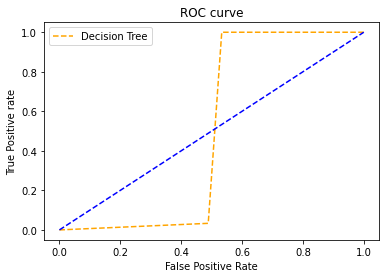

In [207]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, y_pred_prob_dtree, pos_label=1)

 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

# auc_score1 = metrics.roc_auc_score(y_test, y_pred_prob_dtree)

# print('Decision Tree ROC-AUC score: ', auc_score1)


plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Decision Tree')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

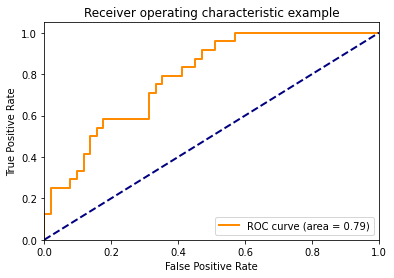

In [163]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [171]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predicted_label = dt.predict(x_test)
dt.score(x_test, y_test)

0.8533333333333334

In [174]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_label))
# print(metrics.confusion_matrix(y_test, predicted_label))
probability = dt.predict_proba(x_test)[:, 1]
print(metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0,1], linestyle = '--')
plt.plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.83      0.80      0.81        30
           2       0.76      0.79      0.78        24

   micro avg       0.85      0.85      0.85        75
   macro avg       0.86      0.86      0.86        75
weighted avg       0.85      0.85      0.85        75
 samples avg       0.85      0.85      0.85        75



TypeError: list indices must be integers or slices, not tuple

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

randomforest = BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, Y_train)
y_pred = randomforest.predict(X_test)

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred,target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.77      0.87        13
   virginica       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.94      0.92      0.92        38



In [ ]:
from sklearn.cluster import KMeans


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

In [43]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=3, n_features=2,random_state=0)

In [46]:
from sklearn.ensemble import BaggingClassifier

In [48]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

In [51]:
from sklearn.tree import plot_tree

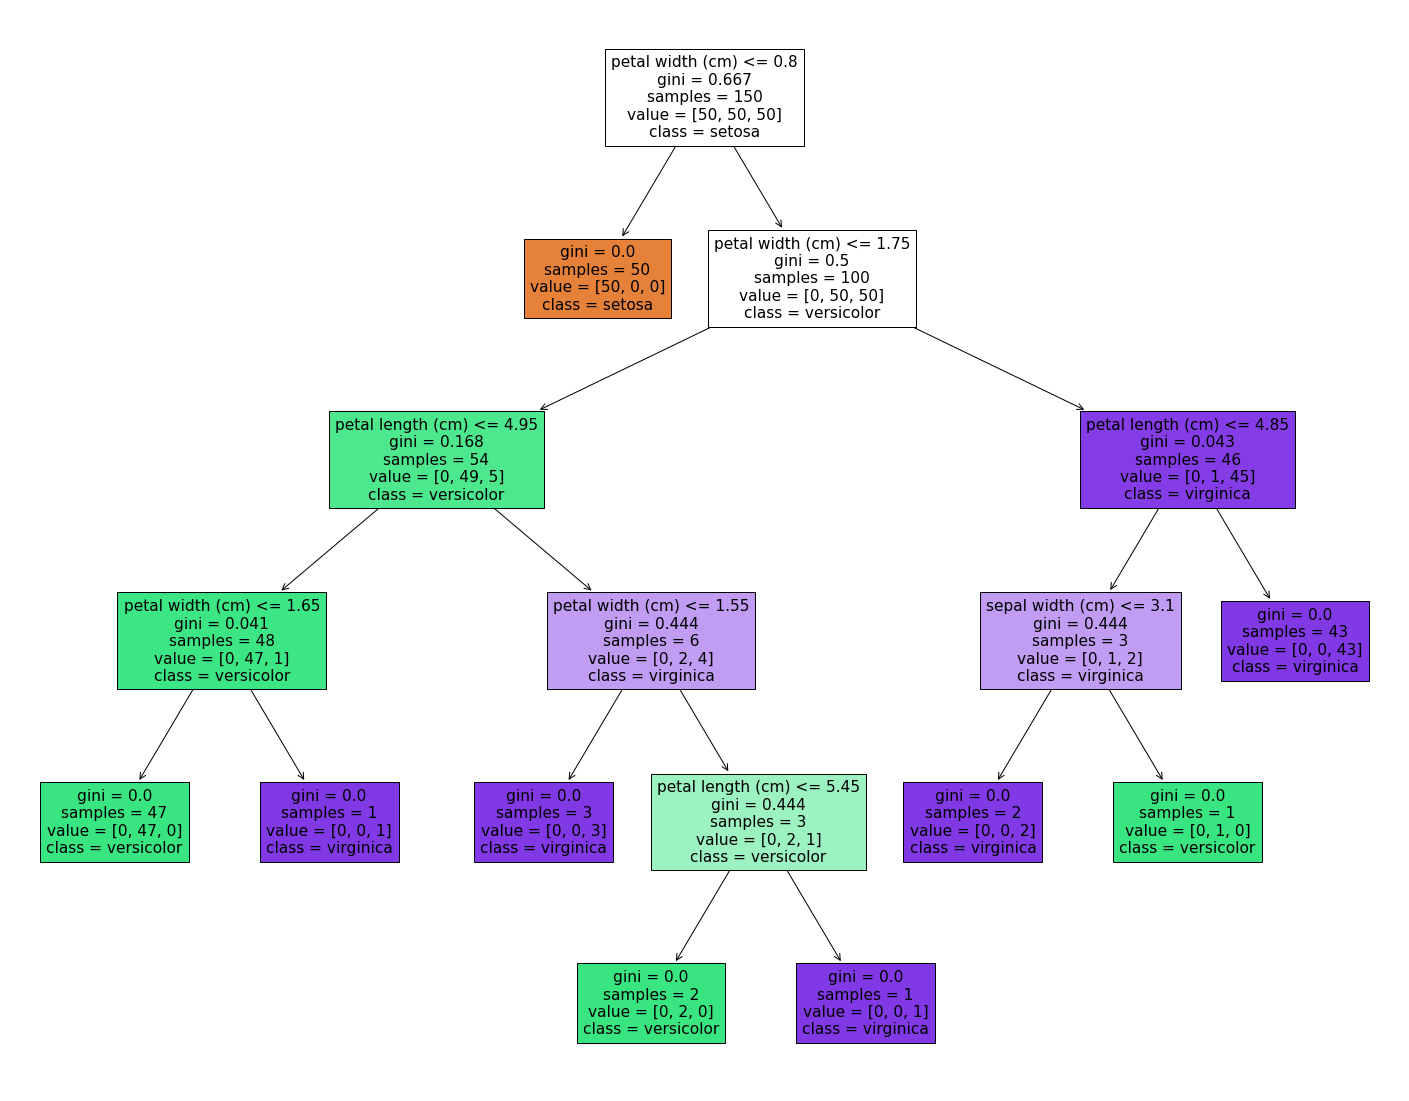

In [60]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
_ = tree.plot_tree(clf,filled=True,feature_names = iris.feature_names,class_names=iris.target_names) 

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test
iris = load_iris
dtree = DecisionTreeClassifier()


In [96]:
from apyori import apriori
import pandas as pd
df = pd.read_csv("marketbasket.csv")
df.head()
df.isnull().sum()
df["Ragi"] = df["Ragi"].fillna(df["Ragi"].mode()[0])
df.isnull().sum()

tid        0
Ragi       0
Rice       0
Potato     0
Tomato     0
Brinjal    0
dtype: int64

In [108]:
# df = df.drop("tid",axis=1)
# df.head()


KeyError: 2

In [119]:
print(df.head())
total_transactions = []
for i in range(len(df)):
    transaction = []
    for j in range(len(df.columns)):
        
        if df.values[i][j] == 1:
            transaction.append(df.columns[j])
        
    if len(transaction):
        total_transactions.append(transaction)
            
        

   Ragi  Rice  Potato  Tomato  Brinjal
0   1.0     0       1       0        1
1   1.0     1       1       0        0
2   1.0     1       0       1        0
3   1.0     1       1       0        0
4   0.0     1       1       0        0


In [140]:
total_transactions

[['Ragi', 'Potato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato'],
 ['Ragi', 'Rice', 'Tomato'],
 ['Ragi', 'Rice', 'Potato'],
 ['Rice', 'Potato'],
 ['Rice', 'Potato'],
 ['Ragi', 'Tomato', 'Brinjal'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Rice', 'Potato', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Ragi', 'Tomato'],
 ['Ragi'],
 ['Ragi', 'Tomato'],
 ['Ragi', 'Tomato', 'Brinjal'],
 ['Ragi', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Ragi', 'Potato', 'Tomato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Ragi', 'Rice', 'Tomato'],
 ['Ragi', 'Rice', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Ragi', 'Rice', 'Tomato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Ragi', 'Potato', 'Tomato', 'Brinjal'],
 ['Potato', 'Brinjal'],
 ['Ragi', 'Potato', 'Tomato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Ri

In [160]:
list_of_transactions

[['Ragi', 'Potato', 'Brinjal'],
 ['Ragi', 'Rice', 'Potato'],
 ['Ragi', 'Rice', 'Tomato'],
 ['Ragi', 'Rice', 'Potato'],
 ['Rice', 'Potato'],
 ['Rice', 'Potato'],
 ['Tomato', 'Brinjal'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Rice', 'Potato', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Tomato'],
 ['Ragi', 'Tomato'],
 ['Ragi', 'Tomato', 'Brinjal'],
 ['Brinjal'],
 ['Potato'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Ragi', 'Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Tomato'],
 ['Ragi', 'Rice', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Tomato'],
 ['Rice', 'Tomato', 'Brinjal'],
 ['Ragi', 'Potato'],
 ['Ragi', 'Potato', 'Tomato', 'Brinjal'],
 ['Potato', 'Brinjal'],
 ['Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Brinjal'],
 ['Tomato', 'Brinjal'],
 ['Potato', 'Tomato', 'Brinjal'],
 ['Rice', 'Potat

In [178]:
rules1 = list(apriori(transactions = list_of_transactions,min_sup = 0.4,min_confidence=0.6))
rules2 = list(apriori(transactions = list_of_transactions, min_sup = 0.4, min_confidence = 0.6))
rules3 = list(apriori(transactions = list_of_transactions))


In [180]:
rules1

[RelationRecord(items=frozenset({'Brinjal', 'Potato'}), support=0.3617021276595745, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Brinjal'}), items_add=frozenset({'Potato'}), confidence=0.6296296296296297, lift=1.0960219478737996), OrderedStatistic(items_base=frozenset({'Potato'}), items_add=frozenset({'Brinjal'}), confidence=0.6296296296296297, lift=1.0960219478737996)]),
 RelationRecord(items=frozenset({'Tomato', 'Brinjal'}), support=0.3191489361702128, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Tomato'}), items_add=frozenset({'Brinjal'}), confidence=0.6000000000000001, lift=1.0444444444444445)]),
 RelationRecord(items=frozenset({'Ragi', 'Potato'}), support=0.3191489361702128, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Ragi'}), items_add=frozenset({'Potato'}), confidence=0.75, lift=1.3055555555555554)]),
 RelationRecord(items=frozenset({'Brinjal', 'Ragi', 'Potato'}), support=0.1702127659574468, ordered_statistics=[OrderedStatistic(items

In [130]:
rules = list(rules)

In [191]:
for item in rules1:
    print(list(item[0])[0]+ "->" + ",".join(list(item[0])[1:]))
    print(item[1])
    print(item[2][0][2])
    pri

Brinjal->Potato
0.3617021276595745
0.6296296296296297
Tomato->Brinjal
0.3191489361702128
0.6000000000000001
Ragi->Potato
0.3191489361702128
0.75
Brinjal->Ragi,Potato
0.1702127659574468
0.7999999999999999
Tomato->Brinjal,Potato
0.1702127659574468
0.8888888888888888
Rice->Ragi,Potato
0.1276595744680851
0.75
